In [3]:
###################################################
import emcee
import numpy as np
import scipy

from astropy.io import fits
from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.cosmology import Planck18 as cosmo
from functools import partial
import time
from astropy.coordinates import SkyCoord
import astropy.units as u
import pyccl as ccl
import clevar
import numpy as np
from astropy.table import Table
import clmm
from clevar.catalog import ClCatalog, MemCatalog
from clevar.match_metrics import recovery
import matplotlib.pyplot as plt
from clevar.match import MembershipMatch
from clevar.match_metrics import distances
from clevar.match_metrics import scaling
from clevar.match import ProximityMatch
from clevar.match_metrics.recovery import ClCatalogFuncs as r_cf
###################################################

## Selection

### Catalogs

In [1]:
import numpy as np
import matplotlib as mpl
import sys
sys.path.append("/sps/lsst/users/maguena/git_codes/wazp_dc2_paper/src_files/")
import pyscritps as paper_tools
from pyscritps import gaussian_paper as gp
import clevar

dc2dir = "/sps/lsst/users/maguena/cats/dc2/cosmoDC2_v1.1.4/extragal/full"
cpath = f"{dc2dir}/wazp/pywazp_gaussian_new"
hpath = f"{dc2dir}/halos"
mt_path = "/sps/lsst/users/maguena/working/wazp_dc2/pywazp_new/"

# select which pz scatter case to be used
cases = ("010", "015", "020", "030", "050")

# read catalogs
data = gp.core.MainData(cpath, hpath, cases, mt_path=mt_path)

# # Match catalogs
data.load_match()


# Compute max share fraction
data.load_match_input()
data.add_shared_frac_max()

# Get matched pairs
from clevar.match import get_matched_pairs
def get_matched_catalogs(wazp, halos, sig):
    h, w = get_matched_pairs(
        halos,
        wazp[sig],
        f"cross.sig{sig}",
    )
    return h,w
cat1, cat2 = get_matched_catalogs(data.wazp, data.halos, '010')


Remove duplicates
165,076
165,033


*** 010 ***
WaZP
    * ClEvar used in matching: 0.17.1
 * Total objects:    408,092
 * multiple (self):  111,245
 * multiple (other): 111,245
 * unique (self):    93,048
 * unique (other):   93,088
 * cross:            93,024

Halo
    * ClEvar used in matching: 0.17.1
 * Total objects:    165,033
 * multiple (self):  96,213
 * multiple (other): 96,213
 * unique (self):    93,088
 * unique (other):   93,048
 * cross:            93,024


*** 015 ***
WaZP
    * ClEvar used in matching: 0.17.1
 * Total objects:    354,187
 * multiple (self):  112,585
 * multiple (other): 112,585
 * unique (self):    90,890
 * unique (other):   90,949
 * cross:            90,844

Halo
    * ClEvar used in matching: 0.17.1
 * Total objects:    165,033
 * multiple (self):  95,000
 * multiple (other): 95,000
 * unique (self):    90,949
 * unique (other):   90,890
 * cross:            90,844


*** 020 ***
WaZP
    * ClEvar used in matching: 0.17.1
 * Total objects:    308,18

In [4]:
t_halo_m200c = Table.read("/sps/lsst/users/maguena/cats/dc2/cosmoDC2_v1.1.4/extragal/full/halos/halos_m200c_13.0.fits")
c1 = data.halos
display(c1)
c2 = data.wazp['010']
display(t_halo_m200c)
display(c2)
c1['halo_id'] = c1['halo_id'].astype(int)
index = {hid: m for hid, m in zip(t_halo_m200c['halo_id'],
                                  t_halo_m200c['m200c'])}
m200c = np.full(len(c1), -1.0)
logm  = np.full(len(c1), -1.0)

for i, hid in enumerate(c1['halo_id']):
    if hid in index:
        val = index[hid]
        m200c[i] = val
        if val > 0:
            logm[i] = np.log10(val)

c1['m200c'] = m200c
c1['log_m200c'] = logm
c2['log_n200'] = np.log10(c2['n200'])

halo_id,ra_true,dec_true,ra,dec,redshift_true,mass_fof,m200c,r200c,skysim_halo_id,NMEM,richness,NMEM_g_star2,NMEM_r_star2,NMEM_i_star2,NMEM_z_star2,NMEM_y_star2,richness_g_star2,richness_r_star2,richness_i_star2,richness_z_star2,richness_y_star2,ra_bary,dec_bary
int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64
1600020475,50.77596621112012,-27.11267297840223,50.775875822529436,-27.112584328955446,0.04530489444732666,2.247e+13,18901145086557.746,0.5539122181878964,4308786475,14,8.259415690053675,4,2,2,2,2,3.3159297517335684,2.0,2.0,2.0,2.0,50.86080257640612,-27.111068884566034
2700020475,49.46685631106464,-25.960657456295777,49.466814189348334,-25.960541211222015,0.04615640640258789,1.633e+13,15062094204754.93,0.5136732064502341,5608786475,14,7.310438276043445,7,5,5,5,5,3.9505018568471444,3.162710828265532,3.162710828265532,3.162710828265532,3.162710828265532,49.430749682006216,-26.004253136511434
17200020453,50.16400668612118,-25.25905307744378,50.16585579512233,-25.259404686564693,0.08653247356414795,2.283e+13,20441971397588.734,0.5883426733419929,9508786453,12,5.623277102797734,5,5,5,4,4,3.3387389360236903,3.3387389360236903,3.3387389360236903,3.130245439035445,3.130245439035445,50.10887874151731,-25.222612608640762
19000020453,49.51595503782168,-26.130631687629403,49.51865674267036,-26.131426039026245,0.09413313865661621,1.199e+13,10668658238016.902,0.47378993370163613,29908786453,15,6.997234500189672,7,7,7,7,7,3.975938934627579,3.975938934627579,3.975938934627579,3.975938934627579,3.975938934627579,49.526283728873516,-26.143323644925193
19800020453,50.68971804154461,-26.886508987581664,50.691634217578326,-26.88681304144144,0.08739697933197021,8.412e+13,71624983358738.03,0.8935768839339135,10408786453,25,10.377440167337566,12,11,9,8,8,5.102184303491505,4.807846043434688,4.353673518160678,4.0503547588246684,4.0503547588246684,50.71067924047927,-26.883765517046655
32800020453,51.49229315287324,-26.308837160731073,51.49405530538187,-26.309071814426567,0.08795535564422607,1.328e+13,10371945197971.832,0.4693405728944591,14908786453,7,4.078294904689155,2,2,2,2,2,1.284161206475952,1.284161206475952,1.284161206475952,1.284161206475952,1.284161206475952,51.53207787114288,-26.281769096943737
2000020442,51.02799219278836,-25.768148487504888,51.03054382968504,-25.767733992572435,0.10751283168792725,3.555e+13,31256384653340.848,0.6889763852240335,9408786442,22,9.068648511775608,3,3,3,3,2,1.7669316487994353,1.7669316487994353,1.7669316487994353,1.7669316487994353,1.5330209172234177,51.04052597864433,-25.76994686512187
32300020442,51.47772552281113,-25.82579874206229,51.48013416475692,-25.825311694587846,0.10751473903656006,1.339e+13,11587427913554.93,0.49502278717470843,43208786442,10,5.4538674639470575,5,4,4,3,3,3.6826146155436636,2.6826146155436636,2.6826146155436636,2.0956992167416817,2.0956992167416817,51.46172414586285,-25.805957090122217
33300020442,50.31241043560731,-26.69591460405023,50.315518939516316,-26.69559169836869,0.108817458152771,3.434e+13,29876928281239.438,0.6786574780101507,44708786442,16,6.788349932828027,8,8,8,8,8,4.952319670491652,4.952319670491652,4.952319670491652,4.952319670491652,4.952319670491652,50.28802465790821,-26.712593565283026


## Completeness

In [5]:
from crow import completeness_models
from crow import purity_models

purity_aguena = purity_models.PurityAguena16()
completeness_aguena = completeness_models.CompletenessAguena16()
###################### MCMC ########################
def log_prior(theta):
    """Define the search space for a_n, b_n, a_logm_piv, b_logm_piv."""
    a_n, b_n, a_logm_piv, b_logm_piv = theta
    # Example bounds: adjust based on your specific Aguena16 priors
    if -5.0 < a_n < 20.0 and -5.0 < b_n < 25.0 and 0.0 < a_logm_piv < 26.0 and 0.0 < b_logm_piv < 20.0:
        return 0.0
    return -np.inf

def log_likelihood_gauss(theta, log_mass, z, r, sigma):

    completeness_aguena.parameters["a_n"] = theta[0]
    completeness_aguena.parameters["b_n"] = theta[1]
    completeness_aguena.parameters["a_logm_piv"] = theta[2]
    completeness_aguena.parameters["b_logm_piv"] = theta[3]

    p = completeness_aguena.distribution(log_mass, z)

    if np.any(np.isnan(p)):
        return -np.inf

    chi2 = (r - p)**2 / sigma**2

    return -0.5 * np.sum(chi2 + np.log(2*np.pi*sigma**2))

def log_probability(theta, log_mass, z, r, sigma):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood_gauss(theta, log_mass, z, r, sigma)

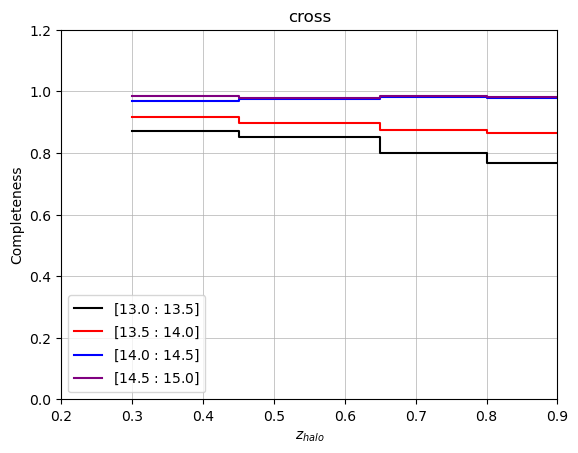

{'recovery': array([[0.87219101, 0.91613179, 0.97008547, 0.98387097],
       [0.8511206 , 0.89871316, 0.97374897, 0.97916667],
       [0.8008342 , 0.87372749, 0.98027613, 0.98571429],
       [0.76755477, 0.86546584, 0.97974684, 0.98245614]]), 'edges1': array([0.3 , 0.45, 0.65, 0.8 , 1.  ]), 'edges2': array([13. , 13.5, 14. , 14.5, 15. ]), 'matched': array([[ 621, 2141,  681,   61],
       [1595, 4330, 1187,   94],
       [2304, 4463,  994,   69],
       [6482, 6967, 1161,   56]]), 'counts': array([[ 712, 2337,  702,   62],
       [1874, 4818, 1219,   96],
       [2877, 5108, 1014,   70],
       [8445, 8050, 1185,   57]])}


In [6]:
redshift_col = 'redshift_true' 
mass_col = 'log_m200c'
#plot style
figx=10
figy=7
matching_selected = 'cross'
zbins = np.array([0.3,  0.45, 0.65, 0.8,  1.])
mbins = np.array([13., 13.5, 14., 14.5, 15.])
#zbins = np.linspace(0, 1.6, 9)
#mbins = np.logspace(14, 15, 5)
fig = plt.figure()#figsize=(figx,figy))
info_comp = r_cf.plot(c1, col1=redshift_col, col2=mass_col, bins1=zbins, bins2=mbins, matching_type=matching_selected, legend_format=lambda x: x, lines_kwargs_list = [{'color':'black'}, {'color':'red'}, {'color':'blue'}, {'color':'purple'}, {'color':'orange'}])
info_comp['ax'].set_xlabel('$z_{halo}$')
info_comp['ax'].set_ylabel('Completeness') 
info_comp['ax'].set_ylim(0,1.2)
info_comp['ax'].set_xlim(0.2,0.9) 
info_comp['ax'].set_title(f'{matching_selected}')
plt.show(fig)
# plt.savefig(outpath+'recovery_plot.png', bbox_inches='tight')
plt.close(fig)
print(info_comp['data'])

In [7]:
edges_z = info_comp["data"]["edges1"]
edges_m = info_comp["data"]["edges2"]
recovery_matrix = info_comp["data"]["recovery"]
n_match = info_comp["data"]["matched"]
n_total = info_comp["data"]["counts"]


z_list = []
for i in range(len(edges_z) - 1):
    z_list.append((edges_z[i] + edges_z[i+1]) / 2.0)

m_list = []
for j in range(len(edges_m) - 1):
    m_list.append((edges_m[j] + edges_m[j+1]) / 2.0)
z_list = np.array(z_list)
m_list = np.array(m_list)
mcmc_z = []
mcmc_m = []
mcmc_rec = []
mcmc_n_total = []
mcmc_n_match = []
for i in range(len(z_list)):        # Loop over redshift bins
    for j in range(len(m_list)):    # Loop over mass bins
        mcmc_z.append(z_list[i])
        mcmc_m.append(m_list[j])
        mcmc_rec.append(recovery_matrix[i, j])
        mcmc_n_total.append(n_total[i, j])
        mcmc_n_match.append(n_match[i, j])
# Convert to numpy arrays for speed in the likelihood function
sigma_mcmc = np.std(mcmc_rec)
mcmc_z = np.array(mcmc_z)
mcmc_m = np.array(mcmc_m)
mcmc_rec = np.array(mcmc_rec)
mcmc_n_total = np.array(mcmc_n_total)
mcmc_n_match = np.array(mcmc_n_match)

print(f"Total data points for MCMC: {len(mcmc_rec)}")
print(mcmc_rec, mcmc_z, mcmc_m, mcmc_n_total, mcmc_n_match, sigma_mcmc)

Total data points for MCMC: 16
[0.87219101 0.91613179 0.97008547 0.98387097 0.8511206  0.89871316
 0.97374897 0.97916667 0.8008342  0.87372749 0.98027613 0.98571429
 0.76755477 0.86546584 0.97974684 0.98245614] [0.375 0.375 0.375 0.375 0.55  0.55  0.55  0.55  0.725 0.725 0.725 0.725
 0.9   0.9   0.9   0.9  ] [13.25 13.75 14.25 14.75 13.25 13.75 14.25 14.75 13.25 13.75 14.25 14.75
 13.25 13.75 14.25 14.75] [ 712 2337  702   62 1874 4818 1219   96 2877 5108 1014   70 8445 8050
 1185   57] [ 621 2141  681   61 1595 4330 1187   94 2304 4463  994   69 6482 6967
 1161   56] 0.06998081760655744


In [8]:
best_fit_c = []
n_params = 4
n_walkers = 50
n_steps = 100000

# Initial guess (center of the ball)
initial_guess = np.array([0.38, 1.26, 11.31, 0.20]) 
pos = initial_guess + 1e-4 * np.random.randn(n_walkers, n_params)

sampler = emcee.EnsembleSampler(
    n_walkers, n_params, log_probability,
    args=(mcmc_m, mcmc_z, mcmc_rec, sigma_mcmc)
)

print("Running MCMC...")
sampler.run_mcmc(pos, n_steps, progress=True)
# Discard first 500 steps and flatten
flat_samples = sampler.get_chain(discard=20000, thin=15, flat=True)


flat_samples = sampler.get_chain(discard=20000, thin=15, flat=True)
flat_log_prob = sampler.get_log_prob(discard=20000, thin=15, flat=True)

# Index of maximum posterior sample
max_ind = np.argmax(flat_log_prob)

map_params = flat_samples[max_ind]

labels_c = ["a_n", "b_n", "a_logm_piv", "b_logm_piv"]

print("MAP (maximum posterior) parameters:")
for label, val in zip(labels_c, map_params):
    best_fit_c.append(val)
    print(f"{label}: {val:.6f}")

Running MCMC...


  0%|          | 0/100000 [00:00<?, ?it/s]/sps/lsst/users/ebarroso/conda_envs/firecrown_clp/lib/python3.13/site-packages/crow/cluster_modules/completeness_models.py:71: RuntimeWarning: overflow encountered in power
  mass_norm_pow = (10.0**log_mass / self._mpiv(z)) ** self._nc(z)
/sps/lsst/users/ebarroso/conda_envs/firecrown_clp/lib/python3.13/site-packages/crow/cluster_modules/completeness_models.py:73: RuntimeWarning: invalid value encountered in divide
  completeness = mass_norm_pow / (mass_norm_pow + 1.0)
100%|██████████| 100000/100000 [01:21<00:00, 1233.52it/s]

MAP (maximum posterior) parameters:
a_n: 0.199409
b_n: 0.302383
a_logm_piv: 10.184969
b_logm_piv: 1.275848


### MOdel versus data

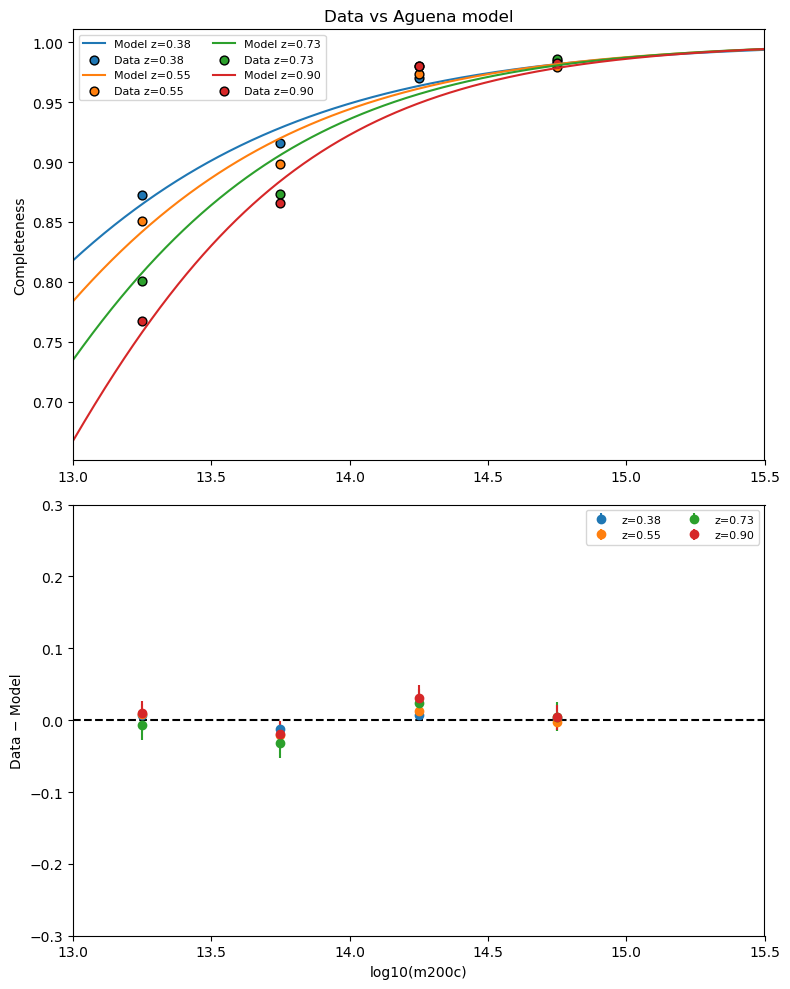

In [9]:
# Set Aguena parameters
completeness_aguena.parameters["a_n"]       = best_fit_c[0]
completeness_aguena.parameters["b_n"]       = best_fit_c[1]
completeness_aguena.parameters["a_logm_piv"] = best_fit_c[2]
completeness_aguena.parameters["b_logm_piv"] = best_fit_c[3]

log_mass_plot = np.linspace(13, 15.5, 1000)

# Create figure with 2 subplots
plt.figure(figsize=(8,10))

# ===== TOP: data vs model =====
plt.subplot(2,1,1)
for i, z in enumerate(z_list):
    model_curve = completeness_aguena.distribution(
        log_mass_plot,
        np.full_like(log_mass_plot, z)
    )
    plt.plot(log_mass_plot, model_curve, label=f"Model z={z:.2f}")
    plt.scatter(m_list, recovery_matrix[i, :], color='C'+str(i), edgecolor='k', s=40, label=f"Data z={z:.2f}")

plt.ylabel("Completeness")
plt.xlim(13,15.5)
plt.title("Data vs Aguena model")
plt.legend(fontsize=8, ncol=2)

# ===== BOTTOM: residuals =====
plt.subplot(2,1,2)
for i, z in enumerate(z_list):
    model_at_bins = completeness_aguena.distribution(
        m_list,
        np.full(len(m_list), z)
    )
    residual = recovery_matrix[i, :] - model_at_bins

    # Empirical scatter per bin as error
    sigma = np.std(residual)

    plt.errorbar(m_list, residual,
                 yerr=sigma,
                 fmt='o',
                 color='C'+str(i),
                 label=f"z={z:.2f}")

plt.axhline(0, color='k', linestyle='--')
plt.xlabel("log10(m200c)")
plt.ylabel("Data − Model")
plt.xlim(13,15.5)
plt.ylim(-0.3, 0.3)
plt.legend(fontsize=8, ncol=2)
plt.tight_layout()
plt.show()


## Two-step fit

z bin 0 (z=0.375)  log10_mc=12.000   nc=0.642
z bin 1 (z=0.550)  log10_mc=12.041   nc=0.611
z bin 2 (z=0.725)  log10_mc=12.469   nc=0.747
z bin 3 (z=0.900)  log10_mc=12.629   nc=0.809


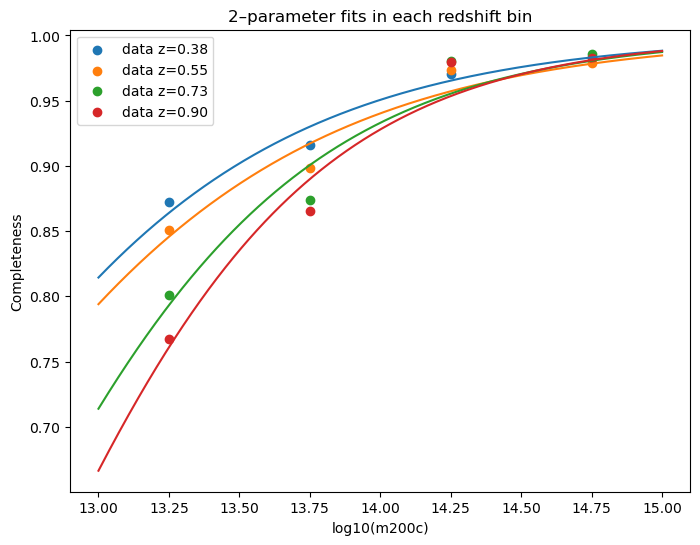


===== FINAL AGUENA–STYLE PARAMETERS FROM 2-PARAM FIT =====
a_logm_piv = 10.1193
b_logm_piv = 1.3223
a_n        = 0.1062
b_n        = 0.3642


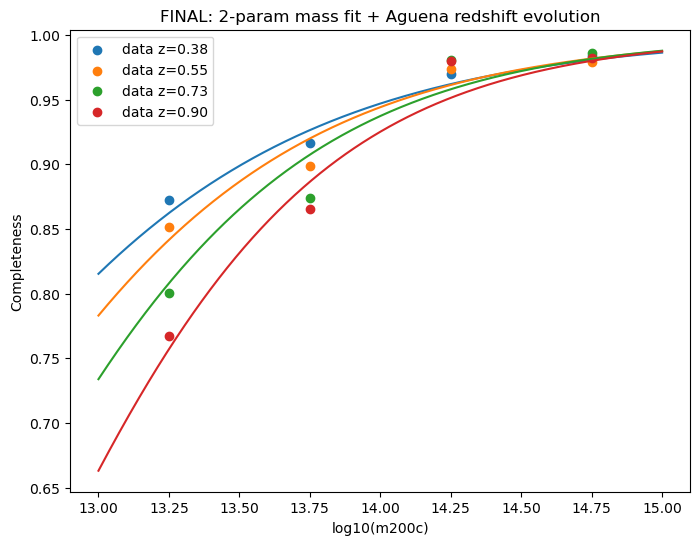

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

###############################################################
# 1) Two–parameter completeness function in MASS ONLY
###############################################################

def f_completeness_param_2(log10m, log10_mc, nc):
    x = nc * np.log(10) * (log10m - log10_mc)
    return np.exp(x) / (1.0 + np.exp(x))


###############################################################
# 2) Extract binned data from info_comp
###############################################################

edges_z = info_comp["data"]["edges1"]
edges_m = info_comp["data"]["edges2"]
recovery_matrix = info_comp["data"]["recovery"]

# Bin centers
z_list = [(edges_z[i] + edges_z[i+1]) / 2.0 for i in range(len(edges_z)-1)]
m_list = [(edges_m[j] + edges_m[j+1]) / 2.0 for j in range(len(edges_m)-1)]

z_list = np.array(z_list)
m_list = np.array(m_list)

nbins_z = len(z_list)
nbins_m = len(m_list)

###############################################################
# 3) Fit (log10_mc , nc) independently in each redshift bin
###############################################################

arr_log10_mc = np.zeros(nbins_z)
arr_nc = np.zeros(nbins_z)

plt.figure(figsize=(8,6))

colors = ["black","red","blue","purple","green","brown"]

for i in range(nbins_z):

    ydata = recovery_matrix[i, :]

    # Curve fit in mass direction
    popt, pcov = curve_fit(
        f_completeness_param_2,
        xdata=m_list,
        ydata=ydata,
        p0=[13.5, 2.0],
        bounds=([12.0, 0.1], [15.0, 10.0])
    )

    arr_log10_mc[i] = popt[0]
    arr_nc[i]       = popt[1]

    print(f"z bin {i} (z={z_list[i]:.3f})  log10_mc={popt[0]:.3f}   nc={popt[1]:.3f}")

    # Plot data and 2-param fit
    x = np.linspace(13, 15, 1000)
    plt.scatter(m_list, ydata, label=f"data z={z_list[i]:.2f}")
    plt.plot(x,
             f_completeness_param_2(x, popt[0], popt[1]))
             #color=colors[i])

plt.xlabel("log10(m200c)")
plt.ylabel("Completeness")
plt.title("2–parameter fits in each redshift bin")
plt.legend()
plt.show()


###############################################################
# 4) Fit redshift evolution of these parameters
#    Aguena form:
#
#    log10_mc(z) = a_logm_piv + b_logm_piv * (1+z)
#    nc(z)       = a_n + b_n * (1+z)
###############################################################

def lin_z(z, a, b):
    return a + b*(1.0 + z)

# ---- Fit for log10_mc(z)
popt_mc, _ = curve_fit(lin_z, z_list, arr_log10_mc)

# ---- Fit for nc(z)
popt_nc, _ = curve_fit(lin_z, z_list, arr_nc)

a_logm_piv, b_logm_piv = popt_mc
a_n, b_n               = popt_nc

print("\n===== FINAL AGUENA–STYLE PARAMETERS FROM 2-PARAM FIT =====")
print(f"a_logm_piv = {a_logm_piv:.4f}")
print(f"b_logm_piv = {b_logm_piv:.4f}")
print(f"a_n        = {a_n:.4f}")
print(f"b_n        = {b_n:.4f}")


###############################################################
# 5) Reconstruct FULL model using these 4 numbers
###############################################################

completeness_aguena_2fit = completeness_models.CompletenessAguena16()
completeness_aguena_2fit.parameters["a_n"] = a_n
completeness_aguena_2fit.parameters["b_n"] = b_n
completeness_aguena_2fit.parameters["a_logm_piv"] = a_logm_piv
completeness_aguena_2fit.parameters["b_logm_piv"] = b_logm_piv


###############################################################
# 6) Final comparison plot: DATA vs RECONSTRUCTED MODEL
###############################################################

plt.figure(figsize=(8,6))

log_mass_plot = np.linspace(13, 15, 1000)

for i,z in enumerate(z_list):

    plt.scatter(m_list,
                recovery_matrix[i,:],
                #color=colors[i],
                label=f"data z={z:.2f}")

    plt.plot(log_mass_plot,
             completeness_aguena_2fit.distribution(log_mass_plot, np.full_like(log_mass_plot, z)))
             #color=colors[i])

plt.xlabel("log10(m200c)")
plt.ylabel("Completeness")
plt.title("FINAL: 2-param mass fit + Aguena redshift evolution")
plt.legend()
plt.show()


### FInal comparison

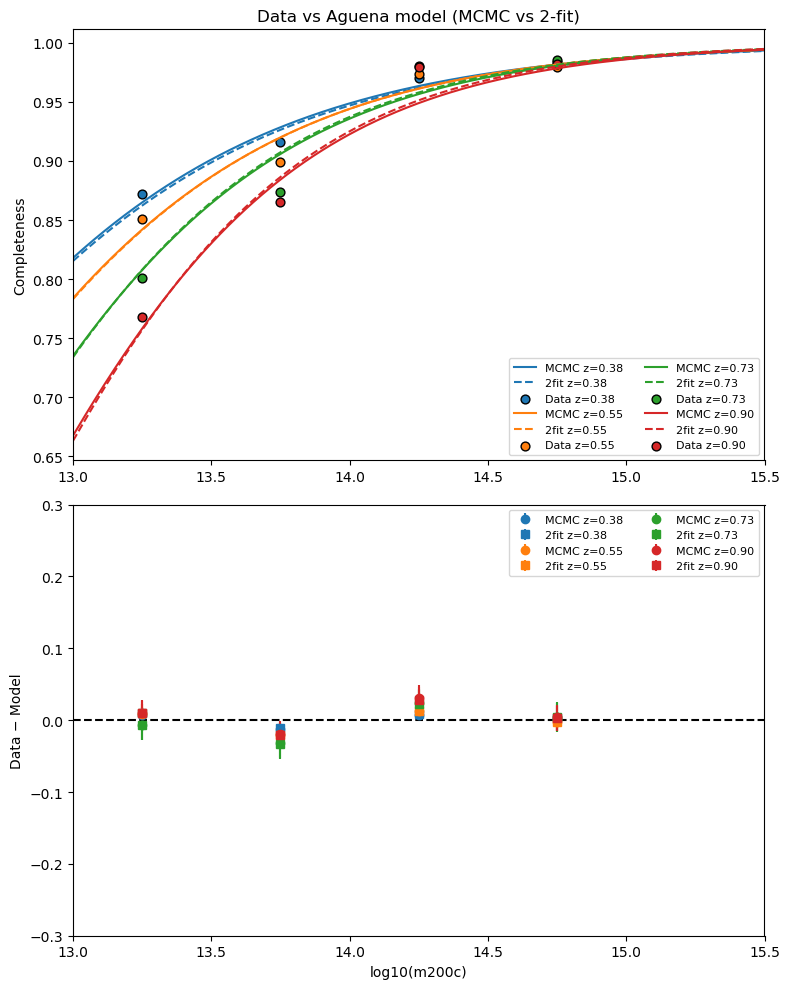

In [11]:

log_mass_plot = np.linspace(13, 15.5, 1000)

# Create figure with 2 subplots
plt.figure(figsize=(8,10))

# ===== TOP: data vs model =====
plt.subplot(2,1,1)
for i, z in enumerate(z_list):
    # Model curves
    model_curve = completeness_aguena.distribution(
        log_mass_plot,
        np.full_like(log_mass_plot, z)
    )
    model_curve_2fit = completeness_aguena_2fit.distribution(
        log_mass_plot,
        np.full_like(log_mass_plot, z)
    )
    
    # Plot curves with different line styles
    plt.plot(log_mass_plot, model_curve, color=f'C{i}', linestyle='-', label=f"MCMC z={z:.2f}")
    plt.plot(log_mass_plot, model_curve_2fit, color=f'C{i}', linestyle='--', label=f"2fit z={z:.2f}")
    
    # Scatter points
    plt.scatter(m_list, recovery_matrix[i, :], color=f'C{i}', edgecolor='k', s=40, label=f"Data z={z:.2f}")

plt.ylabel("Completeness")

plt.xlim(13,15.5)
plt.title("Data vs Aguena model (MCMC vs 2-fit)")
plt.legend(fontsize=8, ncol=2)

# ===== BOTTOM: residuals =====
plt.subplot(2,1,2)
for i, z in enumerate(z_list):
    # Compute residuals
    model_at_bins = completeness_aguena.distribution(
        m_list,
        np.full(len(m_list), z)
    )
    residual = recovery_matrix[i, :] - model_at_bins
    
    model_at_bins_2fit = completeness_aguena_2fit.distribution(
        m_list,
        np.full(len(m_list), z)
    )
    residual_2fit = recovery_matrix[i, :] - model_at_bins_2fit
    
    # Empirical scatter per bin
    sigma = np.std(residual)
    sigma_2fit = np.std(residual_2fit)
    
    # Plot residuals with different markers for clarity
    plt.errorbar(m_list, residual,
                 yerr=sigma,
                 fmt='o',
                 color=f'C{i}',
                 label=f"MCMC z={z:.2f}")
    
    plt.errorbar(m_list, residual_2fit,
                 yerr=sigma_2fit,
                 fmt='s',   # square marker for 2-fit
                 color=f'C{i}',
                 label=f"2fit z={z:.2f}")

plt.axhline(0, color='k', linestyle='--')
plt.xlabel("log10(m200c)")
plt.ylabel("Data − Model")
plt.xlim(13,15.5)
plt.ylim(-0.3, 0.3)
plt.legend(fontsize=8, ncol=2)
plt.tight_layout()
plt.show()



In [12]:
import numpy as np

# Initialize arrays to store relative errors
rel_error_mcmc = []
rel_error_2fit = []

for i, z in enumerate(z_list):
    # model predictions at bin centers
    model_mcmc = completeness_aguena.distribution(
        m_list,
        np.full(len(m_list), z)
    )
    model_2fit = completeness_aguena_2fit.distribution(
        m_list,
        np.full(len(m_list), z)
    )
    
    # Data
    data = recovery_matrix[i, :]
    
    # Avoid division by zero
    mask = data > 0
    
    rel_error_mcmc.extend(np.abs((model_mcmc[mask] - data[mask]) / data[mask]))
    rel_error_2fit.extend(np.abs((model_2fit[mask] - data[mask]) / data[mask]))

# Compute mean relative error
mean_rel_error_mcmc = np.mean(rel_error_mcmc)
mean_rel_error_2fit = np.mean(rel_error_2fit)

print(f"Mean relative error (MCMC fit): {mean_rel_error_mcmc:.3f}")
print(f"Mean relative error (2-param fit): {mean_rel_error_2fit:.3f}")


Mean relative error (MCMC fit): 0.014
Mean relative error (2-param fit): 0.014


## Purity

In [13]:
from crow import purity_models

purity_aguena = purity_models.PurityAguena16()
###################### MCMC ########################
def log_prior(theta):
    """Define the search space for a_n, b_n, a_logm_piv, b_logm_piv."""
    a_n, b_n, a_logm_piv, b_logm_piv = theta
    # Example bounds: adjust based on your specific Aguena16 priors
    if -5.0 < a_n < 20.0 and -5.0 < b_n < 25.0 and 0.0 < a_logm_piv < 26.0 and 0.0 < b_logm_piv < 20.0:
        return 0.0
    return -np.inf

def log_likelihood_gauss_pur(theta, log_mass_proxy, z, r, sigma):

    purity_aguena.parameters["a_n"] = theta[0]
    purity_aguena.parameters["b_n"] = theta[1]
    purity_aguena.parameters["a_logm_piv"] = theta[2]
    purity_aguena.parameters["b_logm_piv"] = theta[3]

    p = purity_aguena.distribution(log_mass_proxy, z)

    if np.any(np.isnan(p)):
        return -np.inf

    chi2 = (r - p)**2 / sigma**2

    return -0.5 * np.sum(chi2 + np.log(2*np.pi*sigma**2))

def log_probability_pur(theta, log_mass_proxy, z, r, sigma):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood_gauss_pur(theta, log_mass_proxy, z, r, sigma)

0.050806418
[1.30103    1.60205999 1.90308999 2.30103   ]


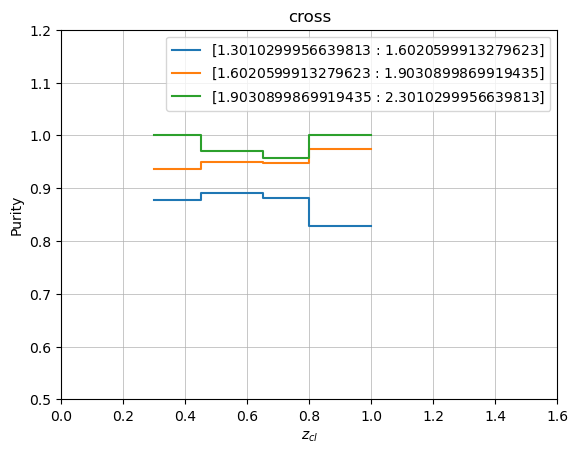

{'recovery': array([[0.87660668, 0.93670886, 1.        ],
       [0.89137591, 0.95012469, 0.96969697],
       [0.88156425, 0.94670051, 0.95774648],
       [0.82828556, 0.97503467, 1.        ]]), 'edges1': array([0.3 , 0.45, 0.65, 0.8 , 1.  ]), 'edges2': array([1.30103   , 1.60205999, 1.90308999, 2.30103   ]), 'matched': array([[ 682,  222,   42],
       [1354,  381,   64],
       [1578,  373,   68],
       [3063,  703,  115]]), 'counts': array([[ 778,  237,   42],
       [1519,  401,   66],
       [1790,  394,   71],
       [3698,  721,  115]])}


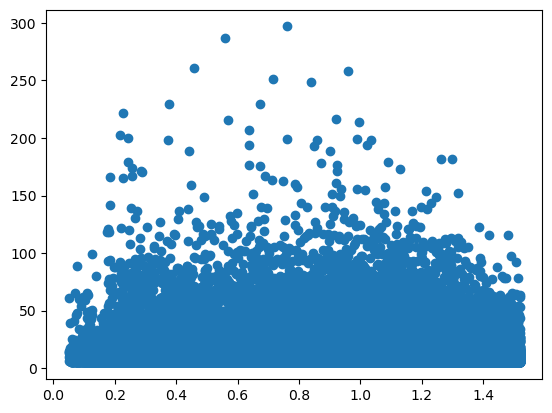

In [14]:
redshift_cluster_col = "zp"
print(np.min(c2['zp']))
richness_cluster_col = "log_n200"
#rbins = np.linspace(np.log10(20), np.log10(200), 4)
rbins = np.log10([20, 40, 80, 200])
#zbins = np.array([0.3, 0.5, 0.75, 1.0])
#mbins = np.logspace(14, 15, 5)
print(rbins)
fig = plt.figure()
info_pur = r_cf.plot(c2, col1=redshift_cluster_col, col2=richness_cluster_col, bins1=zbins, bins2=rbins, matching_type=matching_selected)
info_pur['ax'].set_xlabel('$z_{cl}$')
info_pur['ax'].set_ylabel('Purity') 
info_pur['ax'].set_ylim(0.5,1.2)
info_pur['ax'].set_xlim(0.0,1.6) 
info_pur['ax'].set_title(matching_selected)
plt.show(fig)
plt.close(fig)
print(info_pur["data"])
plt.scatter(c2['zp'], c2['n200'])

In [15]:
edges_z = info_pur["data"]["edges1"]
edges_p = info_pur["data"]["edges2"]
recovery_matrix = info_pur["data"]["recovery"]
n_match = info_pur["data"]["matched"]
n_total = info_pur["data"]["counts"]


z_list = []
for i in range(len(edges_z) - 1):
    z_list.append((edges_z[i] + edges_z[i+1]) / 2.0)

proxy_list = []
for j in range(len(edges_p) - 1):
    proxy_list.append((edges_p[j] + edges_p[j+1]) / 2.0)
z_list = np.array(z_list)
proxy_list = np.array(proxy_list)
mcmc_z = []
mcmc_p = []
mcmc_rec = []
mcmc_n_total = []
mcmc_n_match = []
for i in range(len(z_list)):        # Loop over redshift bins
    for j in range(len(proxy_list)):    # Loop over mass bins
        mcmc_z.append(z_list[i])
        mcmc_p.append(proxy_list[j])
        mcmc_rec.append(recovery_matrix[i, j])
        mcmc_n_total.append(n_total[i, j])
        mcmc_n_match.append(n_match[i, j])
# Convert to numpy arrays for speed in the likelihood function
sigma_mcmc = np.std(mcmc_rec)
mcmc_z = np.array(mcmc_z)
mcmc_p = np.array(mcmc_p)
mcmc_rec = np.array(mcmc_rec)
mcmc_n_total = np.array(mcmc_n_total)
mcmc_n_match = np.array(mcmc_n_match)

print(f"Total data points for MCMC: {len(mcmc_rec)}")
print(mcmc_rec, mcmc_z, mcmc_p, mcmc_n_total, mcmc_n_match, sigma_mcmc)

Total data points for MCMC: 12
[0.87660668 0.93670886 1.         0.89137591 0.95012469 0.96969697
 0.88156425 0.94670051 0.95774648 0.82828556 0.97503467 1.        ] [0.375 0.375 0.375 0.55  0.55  0.55  0.725 0.725 0.725 0.9   0.9   0.9  ] [1.45154499 1.75257499 2.10205999 1.45154499 1.75257499 2.10205999
 1.45154499 1.75257499 2.10205999 1.45154499 1.75257499 2.10205999] [ 778  237   42 1519  401   66 1790  394   71 3698  721  115] [ 682  222   42 1354  381   64 1578  373   68 3063  703  115] 0.05139363658648232


In [16]:
best_fit_p = []
n_params = 4
n_walkers = 50
n_steps = 100000

# Initial guess (center of the ball)
initial_guess = np.array([3.9, -0.3, 1.31, 0.40]) 
pos = initial_guess + 1e-4 * np.random.randn(n_walkers, n_params)

sampler = emcee.EnsembleSampler(
    n_walkers, n_params, log_probability_pur,
    args=(mcmc_p, mcmc_z, mcmc_rec, sigma_mcmc)
)

print("Running MCMC...")
sampler.run_mcmc(pos, n_steps, progress=True)
# Discard first 500 steps and flatten
flat_samples = sampler.get_chain(discard=20000, thin=15, flat=True)


flat_samples = sampler.get_chain(discard=20000, thin=15, flat=True)
flat_log_prob = sampler.get_log_prob(discard=20000, thin=15, flat=True)

# Index of maximum posterior sample
max_ind = np.argmax(flat_log_prob)

map_params = flat_samples[max_ind]

labels_p = ["a_n", "b_n", "a_logm_piv", "b_logm_piv"]

print("MAP (maximum posterior) parameters:")
for label, val in zip(labels_p, map_params):
    best_fit_p.append(val)
    print(f"{label}: {val:.6f}")

Running MCMC...


  0%|          | 393/100000 [00:00<01:15, 1321.73it/s]/sps/lsst/users/ebarroso/conda_envs/firecrown_clp/lib/python3.13/site-packages/crow/cluster_modules/purity_models.py:72: RuntimeWarning: overflow encountered in power
  rich_norm_pow = (10**log_mass_proxy / self._mpiv(z)) ** self._nc(z)
/sps/lsst/users/ebarroso/conda_envs/firecrown_clp/lib/python3.13/site-packages/crow/cluster_modules/purity_models.py:74: RuntimeWarning: invalid value encountered in divide
  purity = rich_norm_pow / (rich_norm_pow + 1.0)
100%|██████████| 100000/100000 [01:14<00:00, 1347.48it/s]

MAP (maximum posterior) parameters:
a_n: -0.475705
b_n: 1.294709
a_logm_piv: 0.003191
b_logm_piv: 0.568812


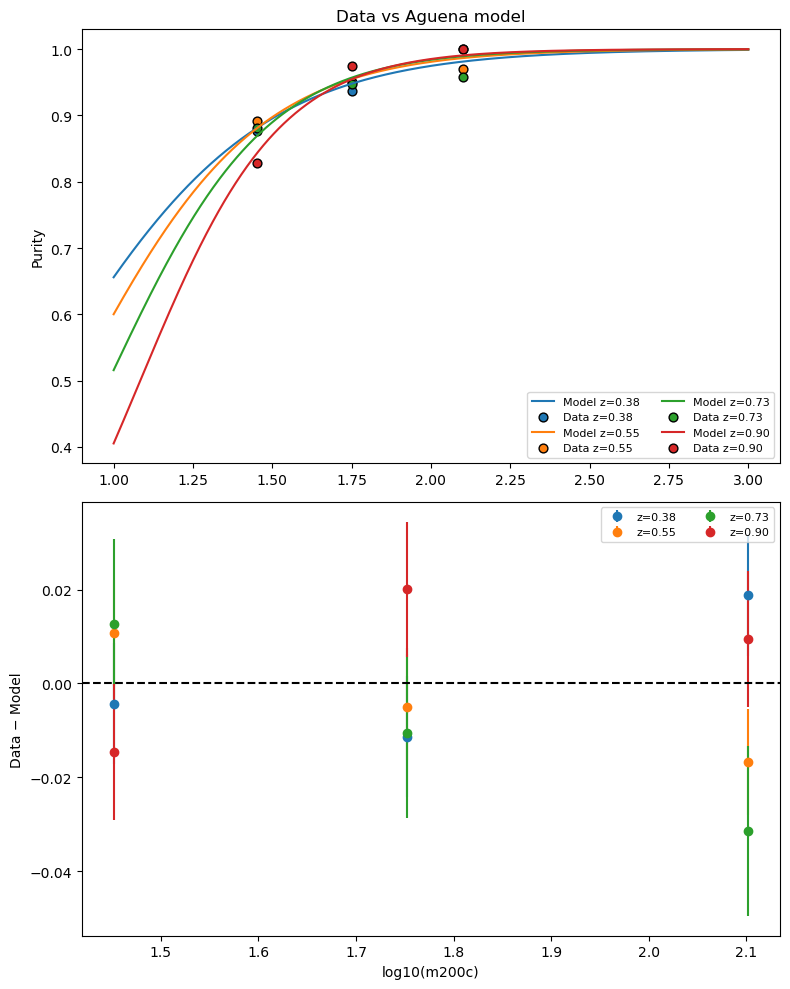

In [17]:
# Set Aguena parameters
purity_aguena.parameters["a_n"]       = best_fit_p[0]
purity_aguena.parameters["b_n"]       = best_fit_p[1]
purity_aguena.parameters["a_logm_piv"] = best_fit_p[2]
purity_aguena.parameters["b_logm_piv"] = best_fit_p[3]

log_proxy_plot = np.linspace(1, 3, 1000)

# Create figure with 2 subplots
plt.figure(figsize=(8,10))

# ===== TOP: data vs model =====
plt.subplot(2,1,1)
for i, z in enumerate(z_list):
    model_curve = purity_aguena.distribution(
        log_proxy_plot,
        np.full_like(log_proxy_plot, z)
    )
    plt.plot(log_proxy_plot, model_curve, label=f"Model z={z:.2f}")
    plt.scatter(proxy_list, recovery_matrix[i, :], color='C'+str(i), edgecolor='k', s=40, label=f"Data z={z:.2f}")

plt.ylabel("Purity")
plt.title("Data vs Aguena model")
plt.legend(fontsize=8, ncol=2)

# ===== BOTTOM: residuals =====
plt.subplot(2,1,2)
for i, z in enumerate(z_list):
    model_at_bins = purity_aguena.distribution(
        proxy_list,
        np.full(len(proxy_list), z)
    )
    residual = recovery_matrix[i, :] - model_at_bins

    # Empirical scatter per bin as error
    sigma = np.std(residual)

    plt.errorbar(proxy_list, residual,
                 yerr=sigma,
                 fmt='o',
                 color='C'+str(i),
                 label=f"z={z:.2f}")

plt.axhline(0, color='k', linestyle='--')
plt.xlabel("log10(m200c)")
plt.ylabel("Data − Model")
plt.legend(fontsize=8, ncol=2)
plt.tight_layout()
plt.show()


## 2STEP approach

z bin 0 (z=0.375)  log10_mc=1.000   nc=1.800
[0.87660668 0.93670886 1.        ]
z bin 1 (z=0.550)  log10_mc=1.000   nc=1.912
[0.89137591 0.95012469 0.96969697]
z bin 2 (z=0.725)  log10_mc=1.000   nc=1.811
[0.88156425 0.94670051 0.95774648]
z bin 3 (z=0.900)  log10_mc=1.227   nc=3.043
[0.82828556 0.97503467 1.        ]


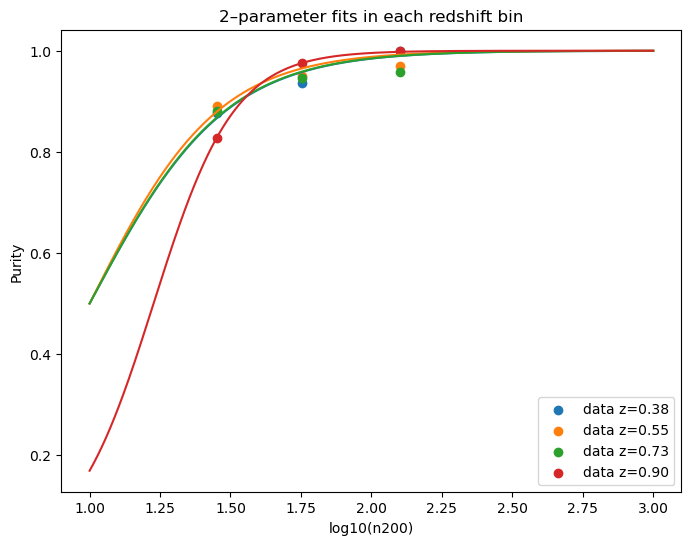


===== FINAL AGUENA–STYLE PARAMETERS FROM 2-PARAM FIT =====
a_logm_piv = 0.4195
b_logm_piv = 0.3892
a_n        = -1.2550
b_n        = 2.0741


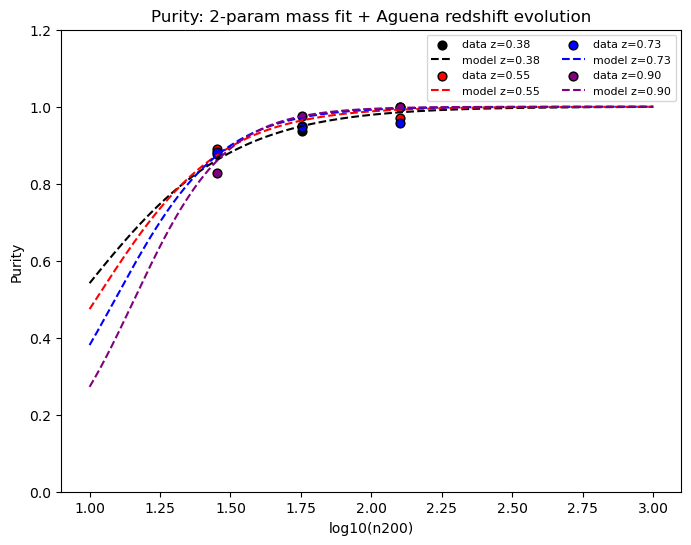

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

###############################################################
# 1) Two–parameter completeness function in MASS ONLY
###############################################################

def f_purity_param_2(log10m, log10_mc, nc):
    x = nc * np.log(10) * (log10m - log10_mc)
    return np.exp(x) / (1.0 + np.exp(x))


###############################################################
# 2) Extract binned data from info_comp
###############################################################

edges_z = info_pur["data"]["edges1"]
edges_p = info_pur["data"]["edges2"]
recovery_matrix = info_pur["data"]["recovery"]

# Bin centers
z_list = [(edges_z[i] + edges_z[i+1]) / 2.0 for i in range(len(edges_z)-1)]
proxy_list = [(edges_p[j] + edges_p[j+1]) / 2.0 for j in range(len(edges_p)-1)]

z_list = np.array(z_list)
proxy_list = np.array(proxy_list)

nbins_z = len(z_list)
nbins_proxy = len(proxy_list)

###############################################################
# 3) Fit (log10_mc , nc) independently in each redshift bin
###############################################################

arr_log10_mc = np.zeros(nbins_z)
arr_nc = np.zeros(nbins_z)

plt.figure(figsize=(8,6))

colors = ["black","red","blue","purple","green","brown"]

for i in range(nbins_z):

    ydata = recovery_matrix[i, :]

    # Curve fit in mass direction
    popt, pcov = curve_fit(
        f_purity_param_2,
        xdata=proxy_list,
        ydata=ydata,
        p0=[1.7, 1.0],
        bounds=([1.0, 0.1], [3.0, 10.0])
    )

    arr_log10_mc[i] = popt[0]
    arr_nc[i]       = popt[1]

    print(f"z bin {i} (z={z_list[i]:.3f})  log10_mc={popt[0]:.3f}   nc={popt[1]:.3f}")

    # Plot data and 2-param fit
    x = np.linspace(1, 3, 1000)
    plt.scatter(proxy_list, ydata, label=f"data z={z_list[i]:.2f}")
    plt.plot(x,
             f_purity_param_2(x, popt[0], popt[1]))
             #color=colors[i])
    print(ydata)
plt.xlabel("log10(n200)")
plt.ylabel("Purity")
plt.title("2–parameter fits in each redshift bin")
plt.legend()
plt.show()


###############################################################
# 4) Fit redshift evolution of these parameters
#    Aguena form:
#
#    log10_mc(z) = a_logm_piv + b_logm_piv * (1+z)
#    nc(z)       = a_n + b_n * (1+z)
###############################################################

def lin_z(z, a, b):
    return a + b*(1.0 + z)

# ---- Fit for log10_mc(z)
popt_mc, _ = curve_fit(lin_z, z_list, arr_log10_mc)

# ---- Fit for nc(z)
popt_nc, _ = curve_fit(lin_z, z_list, arr_nc)

a_logm_piv, b_logm_piv = popt_mc
a_n, b_n               = popt_nc

print("\n===== FINAL AGUENA–STYLE PARAMETERS FROM 2-PARAM FIT =====")
print(f"a_logm_piv = {a_logm_piv:.4f}")
print(f"b_logm_piv = {b_logm_piv:.4f}")
print(f"a_n        = {a_n:.4f}")
print(f"b_n        = {b_n:.4f}")


###############################################################
# 5) Reconstruct FULL model using these 4 numbers
###############################################################

purity_aguena_2fit = purity_models.PurityAguena16()
purity_aguena_2fit.parameters["a_n"] = a_n
purity_aguena_2fit.parameters["b_n"] = b_n
purity_aguena_2fit.parameters["a_logm_piv"] = a_logm_piv
purity_aguena_2fit.parameters["b_logm_piv"] = b_logm_piv


###############################################################
# 6) Final comparison plot: DATA vs RECONSTRUCTED MODEL
###############################################################
plt.figure(figsize=(8,6))

log_proxy_plot = np.linspace(1, 3, 1000)
colors = ["black","red","blue","purple","green","brown"]

for i,z in enumerate(z_list):

    # Scatter of binned purity data
    plt.scatter(proxy_list,
                recovery_matrix[i,:],
                color=colors[i % len(colors)],
                edgecolor='k',
                s=40,
                label=f"data z={z:.2f}")

    # Reconstructed 2-param + Aguena model
    plt.plot(log_proxy_plot,
             purity_aguena_2fit.distribution(log_proxy_plot, np.full_like(log_proxy_plot, z)),
             color=colors[i % len(colors)],
             linestyle='--',
             label=f"model z={z:.2f}")

plt.xlabel("log10(n200)")
plt.ylabel("Purity")
plt.title("Purity: 2-param mass fit + Aguena redshift evolution")
plt.ylim(0, 1.2)
plt.legend(fontsize=8, ncol=2)
plt.show()



### FInal comparaison

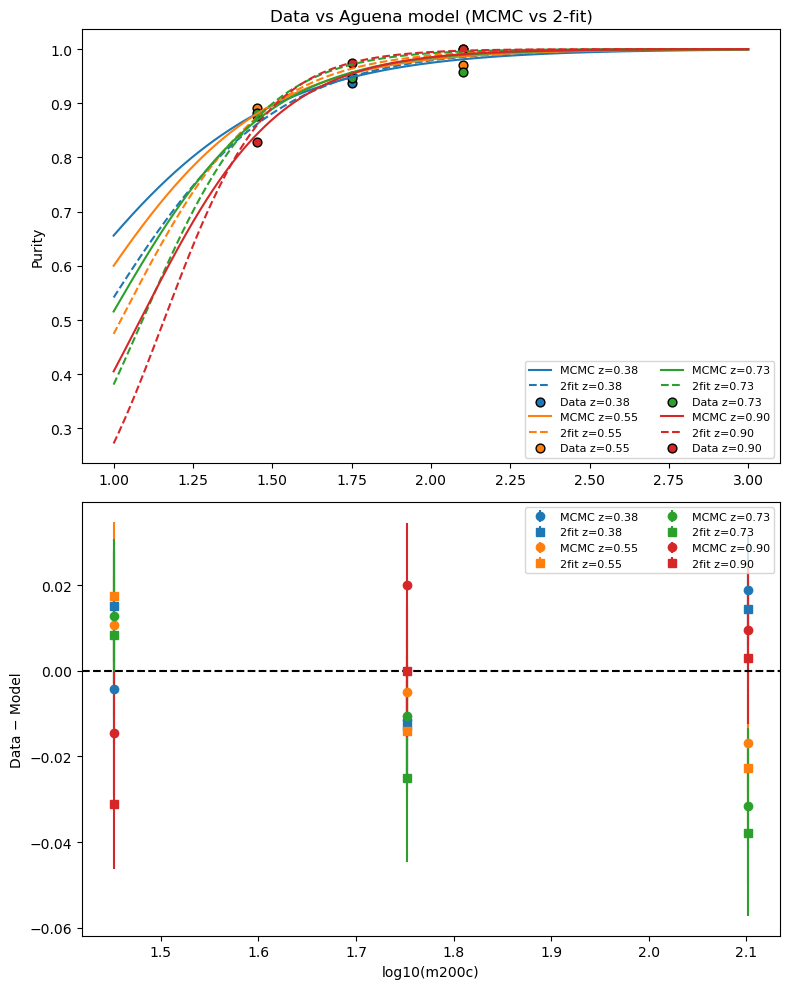

In [19]:

log_proxy_plot = np.linspace(1, 3, 1000)

# Create figure with 2 subplots
plt.figure(figsize=(8,10))

# ===== TOP: data vs model =====
plt.subplot(2,1,1)
for i, z in enumerate(z_list):
    # Model curves
    model_curve = purity_aguena.distribution(
        log_proxy_plot,
        np.full_like(log_proxy_plot, z)
    )
    model_curve_2fit = purity_aguena_2fit.distribution(
        log_proxy_plot,
        np.full_like(log_proxy_plot, z)
    )
    
    # Plot curves with different line styles
    plt.plot(log_proxy_plot, model_curve, color=f'C{i}', linestyle='-', label=f"MCMC z={z:.2f}")
    plt.plot(log_proxy_plot, model_curve_2fit, color=f'C{i}', linestyle='--', label=f"2fit z={z:.2f}")
    
    # Scatter points
    plt.scatter(proxy_list, recovery_matrix[i, :], color=f'C{i}', edgecolor='k', s=40, label=f"Data z={z:.2f}")

plt.ylabel("Purity")

plt.title("Data vs Aguena model (MCMC vs 2-fit)")
plt.legend(fontsize=8, ncol=2)

# ===== BOTTOM: residuals =====
plt.subplot(2,1,2)
for i, z in enumerate(z_list):
    # Compute residuals
    model_at_bins = purity_aguena.distribution(
        proxy_list,
        np.full(len(proxy_list), z)
    )
    residual = recovery_matrix[i, :] - model_at_bins
    
    model_at_bins_2fit = purity_aguena_2fit.distribution(
        proxy_list,
        np.full(len(proxy_list), z)
    )
    residual_2fit = recovery_matrix[i, :] - model_at_bins_2fit
    
    # Empirical scatter per bin
    sigma = np.std(residual)
    sigma_2fit = np.std(residual_2fit)
    
    # Plot residuals with different markers for clarity
    plt.errorbar(proxy_list, residual,
                 yerr=sigma,
                 fmt='o',
                 color=f'C{i}',
                 label=f"MCMC z={z:.2f}")
    
    plt.errorbar(proxy_list, residual_2fit,
                 yerr=sigma_2fit,
                 fmt='s',   # square marker for 2-fit
                 color=f'C{i}',
                 label=f"2fit z={z:.2f}")

plt.axhline(0, color='k', linestyle='--')
plt.xlabel("log10(m200c)")
plt.ylabel("Data − Model")
plt.legend(fontsize=8, ncol=2)
plt.tight_layout()
plt.show()



In [20]:
import numpy as np

# Initialize arrays to store relative errors
rel_error_mcmc = []
rel_error_2fit = []

for i, z in enumerate(z_list):
    # model predictions at bin centers
    model_mcmc = purity_aguena.distribution(
        proxy_list,
        np.full(len(proxy_list), z)
    )
    model_2fit = purity_aguena_2fit.distribution(
        proxy_list,
        np.full(len(proxy_list), z)
    )
    
    # Data
    data = recovery_matrix[i, :]
    
    # Avoid division by zero
    mask = data > 0
    
    rel_error_mcmc.extend(np.abs((model_mcmc[mask] - data[mask]) / data[mask]))
    rel_error_2fit.extend(np.abs((model_2fit[mask] - data[mask]) / data[mask]))

# Compute mean relative error
mean_rel_error_mcmc = np.mean(rel_error_mcmc)
mean_rel_error_2fit = np.mean(rel_error_2fit)

print(f"Mean relative error (MCMC fit): {mean_rel_error_mcmc:.3f}")
print(f"Mean relative error (2-param fit): {mean_rel_error_2fit:.3f}")


Mean relative error (MCMC fit): 0.015
Mean relative error (2-param fit): 0.018
